# Lab02 - Phân tích khám phá dữ liệu (Exploratory Data Analysis)

Trong notebook này, tôi thực hiện **thống kê mô tả** trên bộ dữ liệu bệnh tiểu đường của người da đỏ(diabetes).
Các bước bao gồm:
- Kiểm tra dữ liệu: missing values, duplicates
- Tính các chỉ số thống kê mô tả: mean, median, mode, std, variance, range, IQR
- Trực quan hóa: Histogram, Boxplot
- Thống kê mô tả nâng cao: Skewness, Kurtosis
- Phân tích tương quan giữa các biến
- Đưa ra kết luận

In [34]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv", sep=",")
print(df.head())
print(df.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## Kiểm tra thông tin dữ liệu

- Tất cả các cột đều thuộc kiểu **số nguyên (int64)**, riêng `BMI,DiabetesPedigreeFunction` là .**số thực (float64)**  
- Số dòng = 768 , số cột = 9.  
- Không có giá trị null (missing values).  
- Như vậy dữ liệu sạch, có thể tiến hành thống kê mô tả mà không cần xử lý thiếu dữ liệu.

## Nhận xét thống kê mô tả

1. **Số lượng dữ liệu (count):**  
   - Tất cả các cột đều có **768 quan sát**, không bị thiếu dữ liệu.  

2. **Giá trị bất thường (min/max):**  
   - Một số cột có giá trị bằng 0 nhưng **không hợp lý về mặt y học**:  
     - `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` đều có min = 0.  
     - Đây có thể là **giá trị thay thế cho missing** → cần xử lý.  
   - Cột `Insulin` có max = 846, rất cao so với trung bình 79.8 → nghi ngờ có **outliers**.  

3. **Độ phân tán (std):**  
   - `Insulin` có std = 115.2, lớn hơn cả mean (79.8) → dữ liệu rất phân tán, nhiều biến động.  
   - `Pregnancies`, `Age`, `Glucose` có std vừa phải → dữ liệu ổn định hơn.  

4. **So sánh mean và median (50%):**  
   - `Glucose`: mean = 120.9, median = 117 → khá gần nhau, phân bố gần chuẩn.  
   - `Pregnancies`: mean = 3.85, median = 3 → hơi lệch phải (do có người mang thai nhiều lần).  
   - `Insulin`: mean = 79.8, median = 30.5 → lệch phải mạnh (nhiều giá trị nhỏ, một số cực lớn).  
   - `BMI`: mean ≈ median (31.99 vs 32) → phân bố cân đối.  

5. **Đánh giá phân bố (theo quartiles):**  
   - `SkinThickness` và `Insulin` có IQR nhỏ nhưng max rất lớn → nhiều **outliers**.  
   - `DiabetesPedigreeFunction` có phân bố lệch phải (Q3 = 0.626, max = 2.42).  



In [36]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## Nhận xét từ Histogram và Boxplot

### Histogram
1. **Pregnancies:** phân bố lệch phải, đa số phụ nữ mang thai ít lần (0–6), một số trường hợp đặc biệt tới 17.  
2. **Glucose:** phân bố gần chuẩn, tập trung quanh 100–150, nhưng có giá trị 0 không hợp lý.  
3. **BloodPressure:** tập trung quanh 60–80, nhưng xuất hiện giá trị 0 (không thực tế).  
4. **SkinThickness:** nhiều giá trị 0 → nghi ngờ missing, còn lại phân bố quanh 20–40.  
5. **Insulin:** lệch phải mạnh, nhiều giá trị 0 và một số outliers cực lớn > 400.  
6. **BMI:** phân bố gần chuẩn quanh 30, nhưng có giá trị 0 không hợp lý.  
7. **DiabetesPedigreeFunction:** lệch phải, đa số < 1 nhưng có giá trị cao tới 2.4.  
8. **Age:** lệch phải, tập trung trong khoảng 20–50, có một số bệnh nhân tới 81 tuổi.  
9. **Outcome:** biến nhị phân (0 và 1), mất cân bằng nhẹ (số 0 nhiều hơn số 1).  

### Boxplot
1. **Insulin:** có rất nhiều outliers (các chấm tròn phía trên) → cần xử lý.  
2. **SkinThickness, BMI, Glucose, BloodPressure:** xuất hiện một số outliers nhưng không quá nhiều.  
3. **Pregnancies, Age, DiabetesPedigreeFunction:** có vài outliers, phù hợp với histogram (dữ liệu lệch phải).  
4. **Outcome:** không có outlier vì là biến phân loại.  

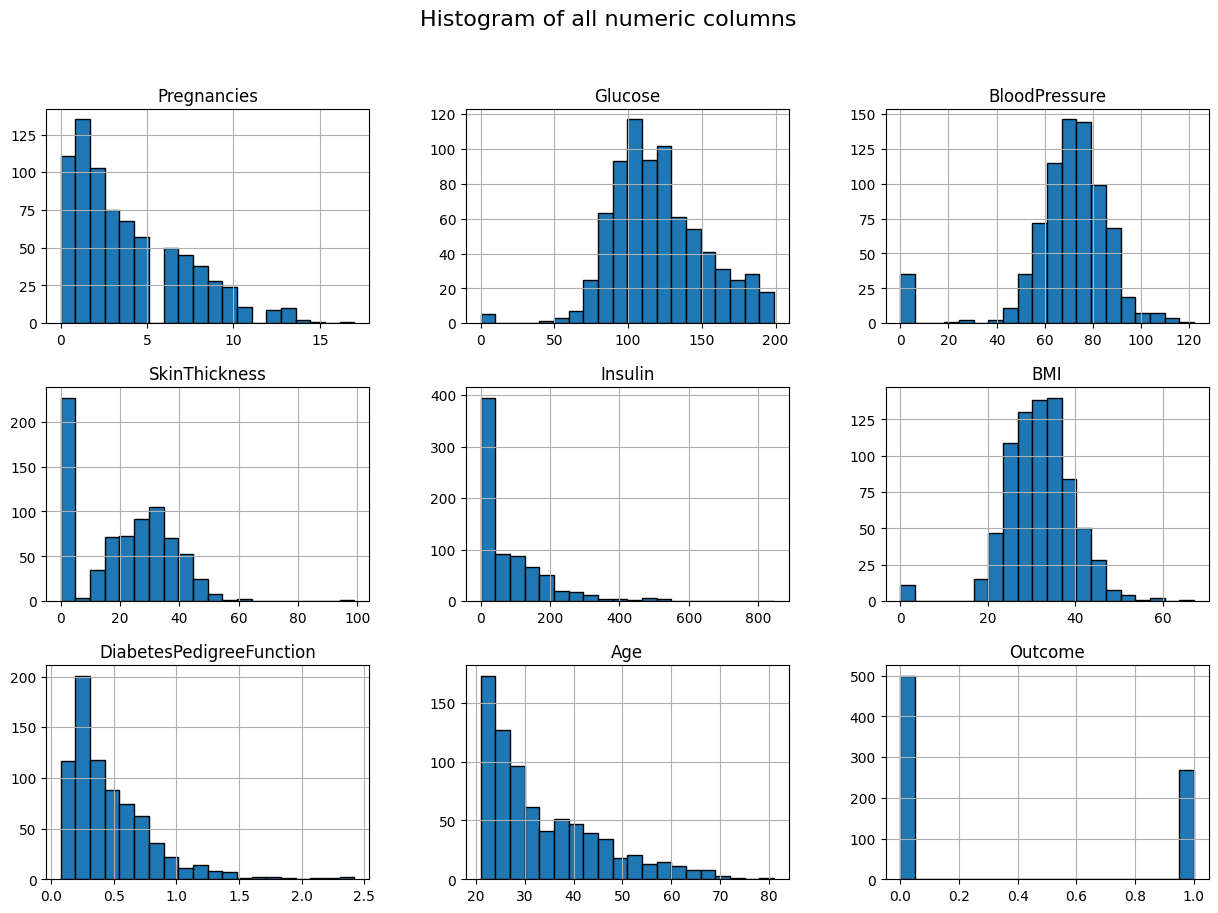

In [37]:
df.hist(bins=20 ,figsize=(15,10),edgecolor="black")
plt.suptitle("Histogram of all numeric columns", fontsize=16)
plt.show()

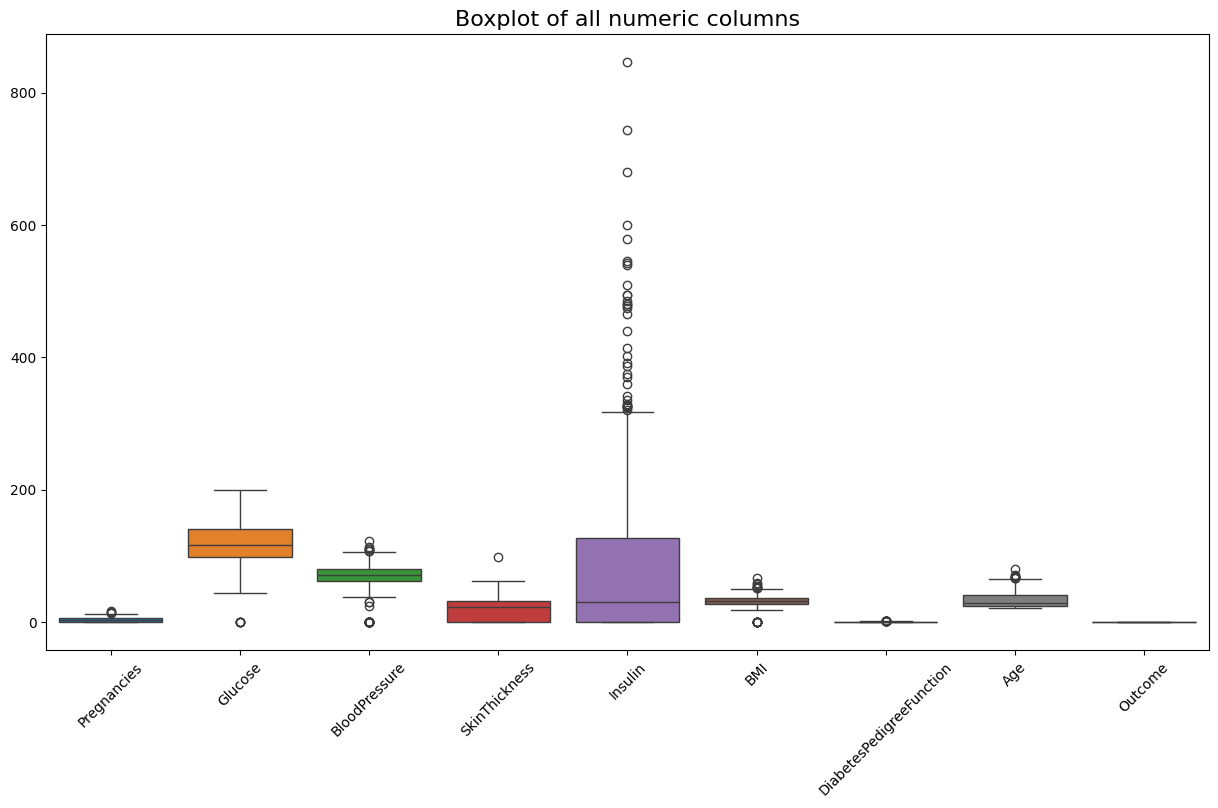

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns",fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [39]:
print("Skewness:\n", df.skew(numeric_only=True))
print("\nKurtosis:\n", df.kurt(numeric_only=True))

Skewness:
 Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Kurtosis:
 Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


In [40]:
range_insulin=df['Insulin'].max()-df['Insulin'].min()
print("range insulin:",range_insulin)

range insulin: 846


In [41]:
insulin_iqr=stats.iqr(df['Insulin'])
print("iqr:",insulin_iqr)

iqr: 127.25


In [42]:
mode_insulin = stats.mode(df['Insulin'], keepdims=True)
print("Mode:", mode_insulin.mode[0])
print("Số lần xuất hiện:", mode_insulin.count[0])

Mode: 0
Số lần xuất hiện: 374


## Kết luận tổng thể

- Dataset **không có missing trực tiếp**, nhưng nhiều biến có giá trị **0 bất hợp lý** (Glucose, BloodPressure, SkinThickness, Insulin, BMI).  
- Các phân tích Range, IQR, Histogram, Boxplot, Skewness và Kurtosis cho thấy:  
  - **Insulin** có rất nhiều outliers, phân bố lệch phải mạnh.  
  - **SkinThickness, BloodPressure, DiabetesPedigreeFunction** cũng có nhiều ngoại lệ.  
  - **Glucose và BMI** khá ổn định, gần phân phối chuẩn.  
- Điều này chứng minh tập dữ liệu cần **tiền xử lý** trước khi đưa vào mô hình học máy:  
  1. Thay thế giá trị 0 bằng **median hoặc mean** hợp lý.  
  2. Xử lý outliers bằng **IQR rule, log-transform hoặc scaling**.  
  3. Chuẩn hóa dữ liệu để mô hình dự đoán bệnh tiểu đường đạt hiệu quả cao hơn.  



